# Clustering Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE as tsne
from sklearn.preprocessing import RobustScaler
from IPython.display import display, FileLink

## Visualizing the data

Raw player data (processed)

In [2]:
df = pd.read_csv('players_preprocessed1.csv')
df.head()

/var/folders/p1/tdyxv03d3h59sb1w2cngxc1m0000gn/T/ipykernel_2730/1083441177.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_preprocessed1.csv')


,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,...,cards_yellow_90mins,cards_yellowred_90mins,cards_red_90mins,penalty_won_90mins,penalty_commited_90mins,penalty_scored_90mins,penalty_missed_90mins,penalty_saved_90mins,passes_90min_I,saves_90min_I
0,6945,G. Moss,Glen,Moss,37.0,1/19/1983,Hastings,New Zealand,New Zealand,188 cm,...,0.000000,0.000000,0.00000,NaN,NaN,0.0,0.0,0.0,0.148148,3.083884
1,2753,M. Milligan,Mark,Milligan,36.0,8/4/1985,Sydney,Australia,Australia,178 cm,...,0.303030,0.000000,0.00000,NaN,NaN,0.0,0.0,NaN,53.801384,NaN
2,6863,C. Valeri,Carl,Valeri,37.0,8/14/1984,Canberra,Australia,Australia,183 cm,...,0.141232,0.035308,0.00000,NaN,NaN,0.0,0.0,NaN,37.307592,NaN
3,6946,N. Boogaard,Nigel,Boogaard,35.0,8/14/1986,Sydney,Australia,Australia,188 cm,...,0.329843,0.000000,0.04712,NaN,NaN,0.0,0.0,NaN,44.147339,NaN
4,114991,M. Delpierre,Matthieu,Delpierre,40.0,4/26/1981,Nancy,France,France,193 cm,...,0.141844,0.000000,0.00000,NaN,NaN,0.0,0.0,NaN,5.177305,NaN


In [3]:
df.columns

Index(['player_id', 'player_name', 'player_firstname', 'player_lastname',
       'player_age', 'player_birth_date', 'player_birth_place',
       'player_birth_country', 'player_nationality', 'player_height',
       'player_weight', 'player_injured', 'player_photo', 'team_id',
       'team_name', 'team_logo', 'league_id', 'league_name', 'league_country',
       'league_logo', 'league_flag', 'league_season', 'games_appearences',
       'games_lineups', 'games_minutes', 'games_number', 'games_position',
       'games_rating', 'games_captain', 'substitutes_in', 'substitutes_out',
       'substitutes_bench', 'shots_total', 'shots_on', 'goals_total',
       'goals_conceded', 'goals_assists', 'goals_saves', 'passes_total',
       'passes_key', 'passes_accuracy', 'tackles_total', 'tackles_blocks',
       'tackles_interceptions', 'duels_total', 'duels_won',
       'dribbles_attempts', 'dribbles_success', 'dribbles_past', 'fouls_drawn',
       'fouls_committed', 'cards_yellow', 'cards_yellowred'

In [4]:
df.shape

(123829, 93)

In [5]:
feature_list = ['games_appearences', 'substitutes_in', 'substitutes_out',
       'substitutes_bench', 'passes_90min_I', 'saves_90min_I',
       'shots_90mins', 'shots_on_90mins', 'goals_total_90mins',
       'goals_conceded_90mins', 'goals_assists_90mins', 
       'passes_key_90mins', 'passes_accuracy_90mins',
       'tackles_total_90mins', 'tackles_blocks_90mins',
       'tackles_interceptions_90mins', 'duels_total_90mins',
       'duels_won_90mins', 'dribbles_attempts_90mins',
       'dribbles_success_90mins', 'dribbles_past_90mins', 'fouls_drawn_90mins',
       'fouls_committed_90mins', 'cards_yellow_90mins',
       'cards_yellowred_90mins', 'cards_red_90mins', 'penalty_won_90mins',
       'penalty_commited_90mins', 'penalty_scored_90mins',
       'penalty_missed_90mins', 'penalty_saved_90mins']

In [6]:
df_sub = df[feature_list]

In [7]:
dfv1 = df_sub.drop(columns=['games_appearences', 'substitutes_in', 'substitutes_out','substitutes_bench'])
dfv2 = df_sub.drop(columns=['games_appearences', 'substitutes_in', 'substitutes_out','substitutes_bench', 
                           "penalty_saved_90mins", "saves_90min_I", "goals_conceded_90mins"])

In [8]:
dfv1.fillna(value=0,inplace=True)
dfv2.fillna(value=0,inplace=True)

In [9]:
dfv1.describe()

,passes_90min_I,saves_90min_I,shots_90mins,shots_on_90mins,goals_total_90mins,goals_conceded_90mins,goals_assists_90mins,passes_key_90mins,passes_accuracy_90mins,tackles_total_90mins,...,fouls_drawn_90mins,fouls_committed_90mins,cards_yellow_90mins,cards_yellowred_90mins,cards_red_90mins,penalty_won_90mins,penalty_commited_90mins,penalty_scored_90mins,penalty_missed_90mins,penalty_saved_90mins
count,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,...,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000
mean,33.791828,0.275701,1.277268,0.494172,0.111552,0.147706,0.100910,1.083032,10.149178,1.341159,...,1.423665,1.508232,0.194569,0.005225,0.006165,0.006669,0.008658,0.011555,0.003320,0.007107
std,36.882222,0.928479,14.329240,6.650829,0.200425,3.625928,1.318972,16.673089,43.446986,14.967934,...,12.554767,11.449043,0.214284,0.038070,0.067484,0.162885,0.308540,0.317193,0.081948,0.380249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.678206,0.000000,0.248071,0.000000,0.000000,0.000000,0.000000,0.204082,1.920000,0.055556,...,0.464516,0.634697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,0.666667,0.203927,0.000000,0.000000,0.000000,0.664207,3.927474,0.903614,...,0.946463,1.097561,0.158172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.358804,0.000000,1.467391,0.571429,0.160428,0.000000,0.112570,1.200000,10.000000,1.624549,...,1.552999,1.643478,0.286078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11520.000000,18.994975,3240.000000,1530.000000,18.000000,1260.000000,270.000000,5130.000000,6300.000000,2430.000000,...,1800.000000,1575.000000,7.826087,7.500000,18.000000,45.000000,90.000000,90.000000,22.500000,120.000000


In [10]:
uplim1 = dfv1.quantile(0.995)
uplim2 = dfv2.quantile(0.995)

In [11]:
uplim1

passes_90min_I                  98.000000
saves_90min_I                    5.000000
shots_90mins                     7.638365
shots_on_90mins                  3.270324
goals_total_90mins               0.989011
goals_conceded_90mins            3.000000
goals_assists_90mins             1.000000
passes_key_90mins                6.175316
passes_accuracy_90mins          93.000000
tackles_total_90mins             6.808862
tackles_blocks_90mins            2.000000
tackles_interceptions_90mins     6.330877
duels_total_90mins              63.623703
duels_won_90mins                28.902839
dribbles_attempts_90mins        11.018162
dribbles_success_90mins          6.226415
dribbles_past_90mins             0.000000
fouls_drawn_90mins               8.511622
fouls_committed_90mins           8.633656
cards_yellow_90mins              1.036866
cards_yellowred_90mins           0.192308
cards_red_90mins                 0.211695
penalty_won_90mins               0.193133
penalty_commited_90mins          0

In [12]:
for col in dfv1.columns:
    dfv1[col].clip(upper=uplim1[col],inplace=True)
dfv1.describe()

for col in dfv2.columns:
    dfv2[col].clip(upper=uplim2[col],inplace=True)
dfv2.describe()

,passes_90min_I,shots_90mins,shots_on_90mins,goals_total_90mins,goals_assists_90mins,passes_key_90mins,passes_accuracy_90mins,tackles_total_90mins,tackles_blocks_90mins,tackles_interceptions_90mins,...,dribbles_past_90mins,fouls_drawn_90mins,fouls_committed_90mins,cards_yellow_90mins,cards_yellowred_90mins,cards_red_90mins,penalty_won_90mins,penalty_commited_90mins,penalty_scored_90mins,penalty_missed_90mins
count,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,...,123829.0,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000,123829.000000
mean,33.575934,0.992791,0.380059,0.110067,0.078586,0.838462,9.230798,1.058949,0.204719,1.055894,...,0.0,1.137637,1.229076,0.192244,0.004442,0.004958,0.004777,0.005917,0.008560,0.002205
std,16.353352,1.073417,0.489978,0.178088,0.140277,0.856535,14.195269,1.054380,0.319424,0.942675,...,0.0,1.036878,1.009899,0.193914,0.021419,0.023424,0.022759,0.026804,0.037311,0.013176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.678206,0.248071,0.000000,0.000000,0.000000,0.204082,1.920000,0.055556,0.000000,0.341556,...,0.0,0.464516,0.634697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.666667,0.203927,0.000000,0.000000,0.664207,3.927474,0.903614,0.054348,0.903475,...,0.0,0.946463,1.097561,0.158172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.358804,1.467391,0.571429,0.160428,0.112570,1.200000,10.000000,1.624549,0.299169,1.518405,...,0.0,1.552999,1.643478,0.286078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,7.638365,3.270324,0.989011,1.000000,6.175316,93.000000,6.808862,2.000000,6.330877,...,0.0,8.511622,8.633656,1.036866,0.192308,0.211695,0.193133,0.237380,0.302013,0.123119


In [13]:
df_trans1 = RobustScaler().fit_transform(dfv1)
df_trans1.shape

df_trans2 = RobustScaler().fit_transform(dfv2)
df_trans2.shape

(123829, 24)

In [14]:
pca_model = PCA(n_components=15, svd_solver='full').fit(df_trans2)
pca = pca_model.transform(df_trans2)

models = []
predictions = []
for n in range(2, 9):
    print(n)
    kmeans = KMeans(n_clusters=n, random_state=0).fit(pca)
    km_preds = kmeans.predict(pca)
    
    models.append(kmeans)
    predictions.append(km_preds)

2
3
4
5
6
7
8


In [16]:
##### HELPER FUNCTIONS #####

def get_centroids(cluster_predicted, df):
    centroids = {}
    C = len(set(cluster_predicted))
    
    for c in range(C):
        centroids[c] = df[cluster_predicted == c].mean(axis=0)

    centroids = pd.concat(centroids, axis=1).T
    
    return centroids

def aggregate_features(df, groupings, agg_names):
    agg_list = []
    
    for group in groupings:
        agg_list.append(df[group].mean(axis=1))
    
    df_agg = pd.concat(agg_list, axis=1)
    df_agg.columns = agg_names
    
    return df_agg

def compute_percentiles(df, centroids):
    C, K = centroids.shape
    
    final = []
    for c in range(C):
        temp = []
        for k in centroids.columns:
            percentile = stats.percentileofscore(df[k], centroids[k][c])
            temp.append(percentile)
        final.append(temp)

    percentiles = pd.DataFrame(np.array(final).transpose()).T
    percentiles.columns = centroids.columns
    
    return percentiles

In [17]:
groupings = [
    # passing
    ["passes_90min_I", "passes_accuracy_90mins", "passes_key_90mins", "goals_assists_90mins"],
    
    # defending
    ["duels_total_90mins", "duels_won_90mins", "tackles_total_90mins", "tackles_blocks_90mins", 
     "tackles_interceptions_90mins"],
    
    # fouling
    ["fouls_committed_90mins", "cards_yellow_90mins", "cards_yellowred_90mins", "cards_red_90mins", 
     "penalty_commited_90mins"],
    
    # dribbling
    ["dribbles_attempts_90mins", "dribbles_success_90mins", "penalty_won_90mins", "fouls_drawn_90mins"], 
    
    # shooting
    ["shots_90mins", "shots_on_90mins", "goals_total_90mins", "penalty_missed_90mins", "penalty_scored_90mins"],
    
    # goalkeeping
    ["saves_90min_I", "penalty_saved_90mins", "goals_conceded_90mins"]
]

agg_names = ["passing", "defending", "fouling", "dribbling", "shooting", "goalkeeping"]

In [18]:
ranking_order = [
    # descending
    [
        "passes_90min_I",
        "passes_accuracy_90mins",
        "passes_key_90mins",
        "duels_total_90mins",
        "duels_won_90mins",
        "tackles_total_90mins",
        "tackles_blocks_90mins",
        "tackles_interceptions_90mins",
        "fouls_drawn_90mins",
        "fouls_committed_90mins",
        "cards_yellow_90mins",
        "cards_yellowred_90mins",
        "cards_red_90mins",
        "penalty_commited_90mins",
        "shots_90mins",
        "shots_on_90mins",
        "goals_total_90mins",
        "goals_assists_90mins",
        "penalty_won_90mins",
        "penalty_scored_90mins",
        "dribbles_attempts_90mins",
        "dribbles_success_90mins",
        "penalty_saved_90mins",
        "saves_90min_I"
    ],
    
    # ascending
    [
        "goals_conceded_90mins",
        "penalty_missed_90mins"
    ]
]

ranks = []

for i, order in enumerate(ranking_order):
    for feature in order:
        col = dfv1[feature]
        
        if i == 0:
            # descending rank
            normalized_col = (col - col.min()) / (col.max() - col.min())
            ranks.append(normalized_col)
        else:
            # ascending rank
            normalized_col = 1 - ((col - col.min()) / (col.max() - col.min()))
            ranks.append(normalized_col)         

ranks = pd.concat(ranks, axis=1)
ranks.loc[df["games_position"] != "Goalkeeper", groupings[-1]] = 0

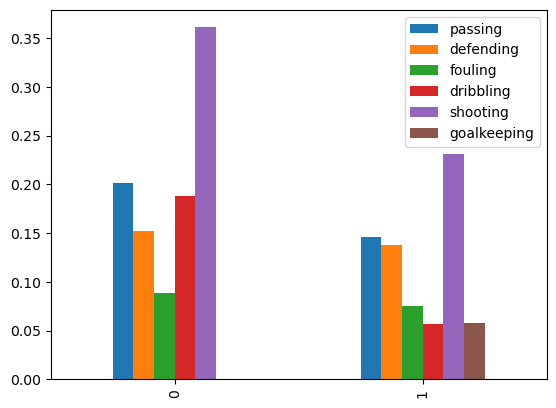

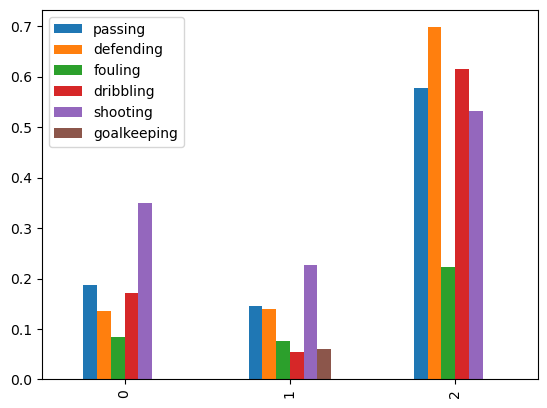

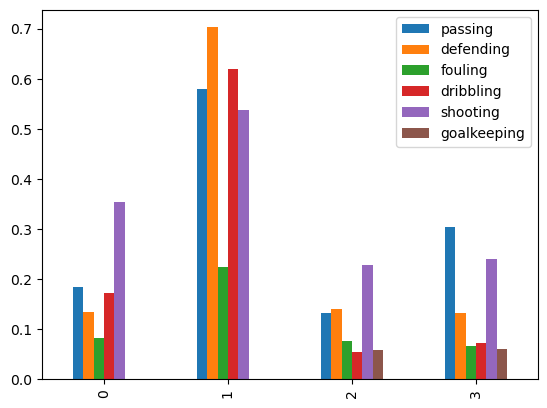

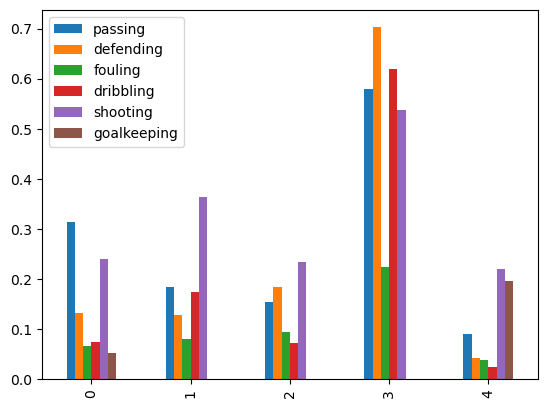

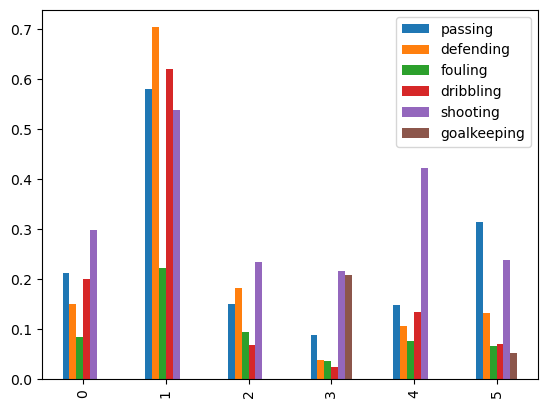

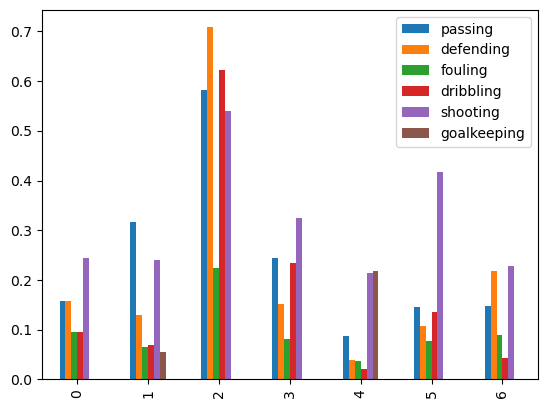

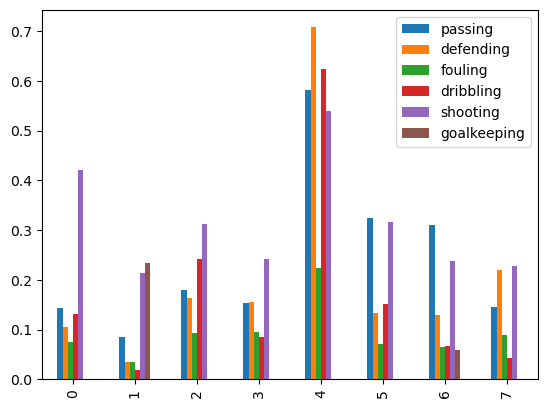

In [19]:
# fig, axes = plt.subplots(len(models), 1, figsize=(20, 20))

for i in range(len(models)):
    model = models[i]
    cluster_predicted = predictions[i]
#     for c in range(model.cluster_centers_.shape[0]):
#         print(pd.value_counts(df[cluster_predicted == c]["games_position"]))
#     print()
    
    centroids = get_centroids(cluster_predicted, ranks)
    
    df_agg = aggregate_features(ranks, groupings, agg_names)
    centroids_agg = aggregate_features(centroids, groupings, agg_names)
#     percentiles_agg = compute_percentiles(df_agg, centroids_agg)
    
    centroids_agg.plot.bar() #ax=axes[i, 0]
#     percentiles_agg.plot.bar(ax=axes[i, 1])

In [23]:
# Define the output file name and path
output_file = 'cluster_analysis.xlsx'

# Create an ExcelWriter object
writer = pd.ExcelWriter(output_file, engine='xlsxwriter')

for r, p in enumerate(groupings):
    for q in p:
        
        A1 = dfv1[q]
        B1 = cluster_predicted
        
        A = A1[A1>0]
        B = cluster_predicted[A1>0]

        # Calculate the percentiles
        percentiles = np.percentile(A, [0, 25, 50, 75, 100])

        # Define the percentile ranges
        ranges = ['0','<25', '25-50', '50-75', '>=75']

        # Create a pandas DataFrame to store the results
        df_quantiles = pd.DataFrame(index=ranges)

        # Loop through each cluster
        for i in range(max(B1)+1):
            # Select the data points in the current cluster
            cluster_data = A[B == i]
            cluster_data_full = A1[B1 == i]
            cluster_size = len(B1[B1 == i])

            # Count the number of data points in each percentile range
            counts = [sum(cluster_data_full == 0)/cluster_size*100]
            counts += [
                len(cluster_data[(cluster_data >= percentiles[j]) & (cluster_data <= percentiles[j+1])])/cluster_size*100
                if j == len(percentiles)-2
                else
                len(cluster_data[(cluster_data >= percentiles[j]) & (cluster_data < percentiles[j+1])])/cluster_size*100
                for j in range(len(percentiles)-1)
            ]

            # Add the counts to the DataFrame
            df_quantiles[f'{i}'] = counts

        # Display the DataFrame
        print(np.unique(cluster_predicted, return_counts=True))
        print(f'{agg_names[r]} - {q}')
        print(df_quantiles)
        
        # Save the DataFrame to the output file in a new worksheet
        sheet_name = f'{q}'
        df_quantiles.to_excel(writer, sheet_name=sheet_name)
        
# Save the Excel file
writer.save()

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([16525, 19080, 13940, 42570,   980,  6712,  6017, 18005]))
passing - passes_90min_I
               0          1          2          3          4          5  \
0       0.000000   0.020964   0.000000   0.000000   0.000000   0.000000   
<25    56.459909  55.052411  25.774749  12.351421  10.102041  12.127533   
25-50  26.202723  27.583857  33.500717  26.720695  18.673469  25.372467   
50-75  12.096823  13.317610  24.024390  33.222927  25.510204  28.843862   
>=75    5.240545   4.025157  16.700143  27.704957  45.714286  33.656138   

               6          7  
0       0.000000   0.000000  
<25    11.085258   3.826715  
25-50   9.655975  15.673424  
50-75  15.838458  32.302138  
>=75   63.420309  48.197723  
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([16525, 19080, 13940, 42570,   980,  6712,  6017, 18005]))
passing - passes_accuracy_90mins
               0          1          2          3          4          5  \
0       0.00

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([16525, 19080, 13940, 42570,   980,  6712,  6017, 18005]))
dribbling - dribbles_attempts_90mins
               0          1          2          3          4          5  \
0       1.192133  53.873166   0.043042   3.643411   1.734694   3.441597   
<25     7.751891  31.399371   0.200861  19.833216   0.306122   5.303933   
25-50  23.279879  10.817610   1.305595  33.864224   1.224490  14.764601   
50-75  38.269289   3.438155  10.480631  32.901104   2.857143  30.199642   
>=75   29.506808   0.471698  87.969871   9.758046  93.877551  46.290226   

               6          7  
0      49.675918  15.984449  
<25     6.248961  55.151347  
25-50  18.082101  20.971952  
50-75  12.946651   6.603721  
>=75   13.046369   1.288531  
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([16525, 19080, 13940, 42570,   980,  6712,  6017, 18005]))
dribbling - dribbles_success_90mins
               0          1          2          3          4          5 

__TSNE Dimensionality Reduction__ - Train TSNE to visualize data in 2D

In [24]:
xReduced_v2 = tsne(n_components=2, learning_rate='auto', 
                   method='barnes_hut', init='pca',n_jobs=-1,verbose=2).fit_transform(df_trans2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 123829 samples in 0.002s...
[t-SNE] Computed neighbors for 123829 samples in 557.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 123829
[t-SNE] Computed conditional probabilities for sample 2000 / 123829
[t-SNE] Computed conditional probabilities for sample 3000 / 123829
[t-SNE] Computed conditional probabilities for sample 4000 / 123829
[t-SNE] Computed conditional probabilities for sample 5000 / 123829
[t-SNE] Computed conditional probabilities for sample 6000 / 123829
[t-SNE] Computed conditional probabilities for sample 7000 / 123829
[t-SNE] Computed conditional probabilities for sample 8000 / 123829
[t-SNE] Computed conditional probabilities for sample 9000 / 123829
[t-SNE] Computed conditional probabilities for sample 10000 / 123829
[t-SNE] Computed conditional probabilities for sample 11000 / 123829
[t-SNE] Computed conditional probabilities for sample 12000 / 123829
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities in 3.182s


/Users/albertodebes/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 113.9231262, gradient norm = 0.0007184 (50 iterations in 55.382s)
[t-SNE] Iteration 100: error = 114.2387772, gradient norm = 0.0002072 (50 iterations in 78.135s)
[t-SNE] Iteration 150: error = 114.2979050, gradient norm = 0.0000750 (50 iterations in 76.790s)
[t-SNE] Iteration 200: error = 114.3114700, gradient norm = 0.0000774 (50 iterations in 67.542s)
[t-SNE] Iteration 250: error = 114.3121414, gradient norm = 0.0000835 (50 iterations in 73.582s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 114.312141
[t-SNE] Iteration 300: error = 5.3430758, gradient norm = 0.0003441 (50 iterations in 44.691s)
[t-SNE] Iteration 350: error = 4.8209200, gradient norm = 0.0001751 (50 iterations in 32.849s)
[t-SNE] Iteration 400: error = 4.5465555, gradient norm = 0.0001118 (50 iterations in 32.217s)
[t-SNE] Iteration 450: error = 4.3662558, gradient norm = 0.0000803 (50 iterations in 31.927s)
[t-SNE] Iteration 500: error = 4.2372427, gradient norm =

In [25]:
xReduced_df = pd.DataFrame(xReduced_v2, columns=["x", "y"])
cluster_predicted_df = pd.DataFrame(data=cluster_predicted, columns=['cluster'])

xReduced_labeled = pd.concat([xReduced_df, cluster_predicted_df], axis=1)

'\nwtf = sns.scatterplot(data=pd.DataFrame(xReduced_v2[[24078, 24530, 25024, 25496],:]),x=0,y=1,color=\'black\',marker="$\\circ$", ec="face", s=250)\nwtf.legend(fontsize=20)\nfor ind in [24078, 24530, 25024, 25496]:\n    #[24078,  24530,  25024,  25496,  36088,  36419,  36653,  36929,\n    #         39141,  39883,  56311,  56784,  79546,  79982,  80419, 108320,\n    #        109929, 111740, 112441, 115758, 116627, 117477, 117478, 118462,\n    #        119814, 120769]:\n    #print()\n    tmpoff = 5*np.random.randn(2)\n    txtStr = str(df.loc[ind][\'league_season\'])+\' - \'+df.loc[ind][\'league_name\']\n    #print(xReduced_v2[ind,0],xReduced_v2[ind,1])\n    wtf.text(xReduced_v2[ind,0]-65,xReduced_v2[ind,1]+(df.loc[ind][\'league_season\']!=2021)*7,txtStr,fontsize=24)\nplt.show()\n'

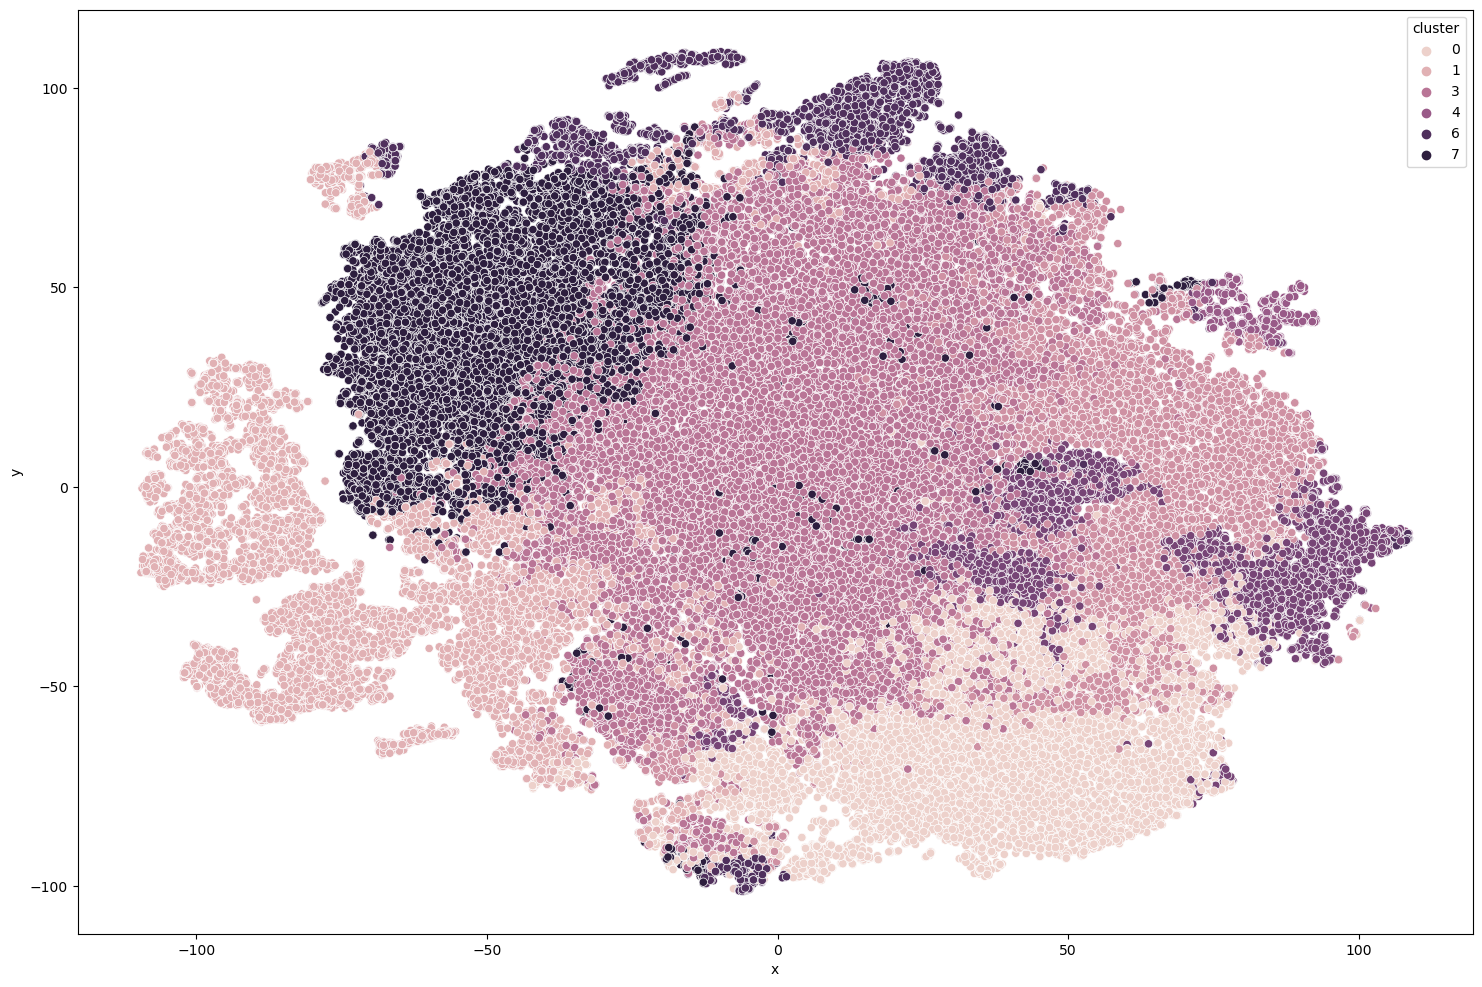

In [115]:
plt.figure(figsize=(18,12))
wtf = sns.scatterplot(data=xReduced_labeled, x="x", y="y", hue="cluster")#df.games_position)
#wtf.legend(fontsize=20)
"""
wtf = sns.scatterplot(data=pd.DataFrame(xReduced_v2[[24078, 24530, 25024, 25496],:]),x=0,y=1,color='black',marker="$\circ$", ec="face", s=250)
wtf.legend(fontsize=20)
for ind in [24078, 24530, 25024, 25496]:
    #[24078,  24530,  25024,  25496,  36088,  36419,  36653,  36929,
    #         39141,  39883,  56311,  56784,  79546,  79982,  80419, 108320,
    #        109929, 111740, 112441, 115758, 116627, 117477, 117478, 118462,
    #        119814, 120769]:
    #print()
    tmpoff = 5*np.random.randn(2)
    txtStr = str(df.loc[ind]['league_season'])+' - '+df.loc[ind]['league_name']
    #print(xReduced_v2[ind,0],xReduced_v2[ind,1])
    wtf.text(xReduced_v2[ind,0]-65,xReduced_v2[ind,1]+(df.loc[ind]['league_season']!=2021)*7,txtStr,fontsize=24)
plt.show()
"""

In [26]:
centroids_df = pd.concat([centroids, centroids_agg], axis=1)
output_df = pd.concat([df, df_agg, xReduced_df, cluster_predicted_df], axis=1)
output_df = output_df.drop(columns=['passes_90mins', 'saves_90mins', 'count_(player)','pass_threshold', 'save_threshold'])

In [27]:
centroids_df.to_csv('centroids.csv', index=False)
output_df.to_csv('output.csv', index=False)

__Rough__

In [9]:
xReduced = tsne(n_components=2, learning_rate='auto', 
                method='barnes_hut', init='pca', n_jobs=-1, verbose=2).fit_transform(dfv1.loc[:].to_numpy())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 123829 samples in 0.022s...


KeyboardInterrupt: 

In [ ]:
tsne_df = pd.DataFrame(xReduced)
tsne_df.head()

In [ ]:
plt.figure(figsize=(18,15))
sns.scatterplot(data=tsne_df, x=0, y=1, hue=df.games_position)
plt.show()

In [32]:
plt.figure(figsize=(18,12))
wtf = sns.scatterplot(data=pd.DataFrame(xReduced_v2), x=0, y=1, hue=df.games_position)

NameError: name 'xReduced_v2' is not defined

<Figure size 1296x864 with 0 Axes>

In [ ]:
for col in dfv1.columns:
    plt.figure(figsize=(12,9))
    sns.scatterplot(data=pd.DataFrame(xReduced_v2), x=0, y=1, hue=dfv1[col])
    plt.show()

In [ ]:
xReduced_v3 = tsne(n_components=3, learning_rate='auto', method='barnes_hut', init='pca',n_jobs=-1,verbose=2).fit_transform(df_trans)

In [ ]:
xRedv3_df = pd.DataFrame(xReduced_v3)
xRedv3_df['positon'] = df.games_position
xRedv3_df.head()

In [ ]:
plt.figure(figsize=(24,18))
sns.pairplot(data=xRedv3_df, hue='positon')
plt.show()

In [10]:
def c_fn(x):
    if(x == 'Goalkeeper'):
        return 'r'
    elif(x == 'Midfielder'):
        return 'b'
    elif(x == 'Defender'):
        return 'b'
    elif(x == 'Attacker'):
        return 'k'
        
c = df.games_position.apply(lambda x: c_fn(x))

In [11]:
df.games_position.unique()

array(['Goalkeeper', 'Midfielder', 'Defender', 'Attacker'], dtype=object)

In [12]:
c.unique()

array(['r', 'b', 'k'], dtype=object)

In [34]:
from sklearn.manifold import Isomap
from sklearn.decomposition import KernelPCA
from sklearn.manifold import locally_linear_embedding
from sklearn.manifold import MDS

In [ ]:
#xReduced_v4 = Isomap(n_components=2,neighbors_algorithm='kd_tree',path_method='D',eigen_solver='arpack',n_jobs=-1,max_iter=100).fit_transform(df_trans[:5000,:])
#xReduced_v4 = KernelPCA(n_components=2,kernel='rbf',eigen_solver='arpack',n_jobs=-1,max_iter=100).fit_transform(df_trans[:5000,:])
#xReduced_v4 = locally_linear_embedding(df_trans[:5000,:], n_neighbors=5, n_components=2, eigen_solver='arpack',n_jobs=-1,max_iter=100)
#xReduced_v4 = MDS(n_components=2,normalized_stress='auto',n_jobs=-1,verbose=2).fit_transform(df_trans[:2000,:])

In [ ]:
#xReduced_v4[0]